<a href="https://colab.research.google.com/github/TheDon57/MODS_Exercises/blob/main/Week_9_exercise/Sentiment_Analysis_Week_09_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
# Set seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

## Introduction

So far we have only worked with what we call "structured" data, meaning the information was always stored in a tabular form where each instance (row) contained the same properties (columns). However, estimates suggest that about 80% of today's data is unstructured.

Unlike structured data, which is tidy and mostly numeric in content, unstructured data is mainly textual or visual and, therefore, messy. The task of extracting knowledge from text documents, known as text analysis or natural language understanding, is highly complex and still limited by the ability of computers to understand the subtleties of human languages.

One popular task in natural language processing (NLP) is `Sentiment Analysis`, which tries to extract the sentiment (e.g., positive, negative, etc.) of a given text (e.g., tweet).

In this weeks tutorial we will start working with textual data, go through the necessary `Preprocessing` steps for the computer to be able to understand the information and lastly apply `dictionary-based Sentiment Analysis` to the texts in order to extract their sentiment.

## Data

The dataset we will use contains movie reviews from IMDB. Initially the data is stored as a dataframe with three columns (id, sentiment_human, text).


*Run the code below.*

In [1]:
import pandas as pd
#Loading the data from a csv file
reviews = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/imdb_sample.csv")

### Display Document

First of all, let's have a look at the raw data. The raw data contains an ID, a human sentiment (positive or negative), and the corresponding review text.

*Run the code below to get first insights on the reviews.*

In [2]:
reviews.head()

,id,sentiment_human,text
0,5814_8,positive,With all this stuff going down at the moment w...
1,2381_9,positive,"\""The Classic War of the Worlds\"" by Timothy H..."
2,7759_3,negative,The film starts with a manager (Nicholas Bell)...
3,3630_4,negative,It must be assumed that those who praised this...
4,9495_8,positive,Superbly trashy and wondrously unpretentious 8...


## Preprocessing
Since unstructured data doesn't have an inherent and consistent structure we have to perform some preprocessing steps in order to make the data usable for the computer.
One thing to keep in mind is that the more preprocessing we perform the more information we lose, but the basic methods we are using here require it.

### Tokenize documents
First, we tokenize the texts. This means we transform the texts from one long string to a list of tokens. Additionally we also start removing unwanted characters (e.g punctuation between sentences, numbers, etc.).
For a full list and explanation of the used parameters you can have a look at the documentation.

In the code, we use `nltk.word_tokenize(text)` to break the input text into individual words or tokens. This is the first step in preprocessing, as computers need to work with smaller units rather than entire sentences.

### Stem all words
After tokenizing the texts we perform stemming (alternatively lemmatization could be performed). Stemming reduces every word to its stem.
The stemmer we use here is the Porter Stemmer.

Here, we create a `PorterStemmer` object from NLTK. Then, for each token, we apply `stemmer.stem(token)` to reduce words to their root form. For example, "running", "runs", and "ran" might all be reduced to "run". This helps in grouping similar words together, making the analysis more consistent.

### Remove stopwords
Finally we remove words that don't contain real meaning and are commonly used (e.g. 'this', 'the', 'a', etc.).

We get a list of English stopwords using `nltk.corpus.stopwords.words("english")`. Then, we filter out any stemmed tokens that are in this list (case-insensitive). Stopwords are common words that don't carry much sentiment or meaning, so removing them reduces noise in the data.

### Remove punctuation
Additionally, we remove any remaining punctuation marks from the filtered tokens. This is done by checking if each token is not in `string.punctuation`, which contains common punctuation characters like '.', ',', '!', etc. This further cleans the text by eliminating non-alphabetic characters that aren't useful for sentiment analysis.

The function `preprocess(text)` combines all these steps and returns a list of cleaned, stemmed tokens without stopwords or punctuation.

*Run the code below.*

In [3]:
# Preprocessing
import nltk
import string

# Download the necessary nltk resource
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


#Define function with all necessary preprocessing steps for our IMDB reviews.
def preprocess(text):
    # tokenize the text
    tokens = nltk.word_tokenize(text)

    # create stemmer object
    stemmer = nltk.stem.PorterStemmer()

    # stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # get list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # remove stopwords
    filtered_tokens = [token for token in stemmed_tokens if token.lower() not in stopwords]

    # remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return filtered_tokens_nopunct

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Apply preprocessing

After defining the different preprocessing steps, we now apply these preprocessing steps to our IMDB reviews.

In the code, `reviews['text'].apply(preprocess)` takes each review text from the 'text' column of the DataFrame and passes it to our `preprocess` function. This function returns a list of cleaned tokens for each review. These lists are then stored in a new column called 'tokens' in the `reviews` DataFrame.

To see the result, we display the first row of the DataFrame using `reviews.iloc[0]`. This shows the original columns (id, sentiment_human, text) plus the new 'tokens' column, which contains the preprocessed list of words from the first review. This helps us verify that the preprocessing worked correctly and gives insights into how the raw text has been transformed into a structured list of tokens.

*Run the code below.*

In [4]:
reviews['tokens'] = reviews['text'].apply(preprocess)

#show tokens for the first review in our dataset to get some insights
reviews.iloc[0]

,0
id,5814_8
sentiment_human,positive
text,With all this stuff going down at the moment w...
tokens,"[thi, stuff, go, moment, mj, 've, start, liste..."


In [5]:
#show review data with new column tokens
reviews.head()

,id,sentiment_human,text,tokens
0,5814_8,positive,With all this stuff going down at the moment w...,"[thi, stuff, go, moment, mj, 've, start, liste..."
1,2381_9,positive,"\""The Classic War of the Worlds\"" by Timothy H...","['', classic, war, worlds\, '', timothi, hine,..."
2,7759_3,negative,The film starts with a manager (Nicholas Bell)...,"[film, start, manag, nichola, bell, give, welc..."
3,3630_4,negative,It must be assumed that those who praised this...,"[must, assum, prais, thi, film, '', greatest, ..."
4,9495_8,positive,Superbly trashy and wondrously unpretentious 8...,"[superbl, trashi, wondrous, unpretenti, 80, 's..."


## Dictionary-Based Sentiment Analysis
`Dictionary-based Sentiment Analysis` works by looking up the sentiment of each word occurring in a text in a `sentiment dictionary`. Afterwards the single sentiment scores are summed up to evaluate the text's sentiment.

## NRC Sentiment Dictionary

### Load NRC sentiment dictionary
We use the NRC sentiment dictionary. This dictionary contains ten classes: anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise and trust.
Currently we are only interested in positive and negative words.

In the code, we first load the NRC Emotion Lexicon from a URL using `pd.read_csv()`. The file is tab-separated (`sep='\t'`), has no header row (`header=None`), and we assign column names: 'word', 'emotion', and 'association'. The 'association' column indicates whether a word is linked to an emotion (1 for yes, 0 for no).

Next, we filter the DataFrame to keep only rows where 'association' is 1, meaning we only consider words that are actually associated with emotions.

We define sets for positive emotions (`{'positive'}`) and negative emotions (`{'negative'}`), as we're focusing on these two for sentiment analysis.

Then, we filter the DataFrame for words associated with positive emotions using `nrc_df['emotion'].isin(positive_emotions)`, select the 'word' column, and get unique words with `.unique()`. This gives us a list of all unique positive words.

We do the same for negative words, resulting in `positive_words` and `negative_words` arrays that we can use to look up sentiment in our reviews.

*Run the code below.*

In [6]:
# Load NRC Emotion Lexicon
nrc_df = pd.read_csv('https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Define positive and negative emotion categories
positive_emotions = {'positive'}
negative_emotions = {'negative'}

# Filter words by emotion category and collect unique words for each sentiment orientation
positive_words = nrc_df[nrc_df['emotion'].isin(positive_emotions)]['word'].unique()
negative_words = nrc_df[nrc_df['emotion'].isin(negative_emotions)]['word'].unique()



### Sample from dictionary
We can look at an excerpt of the positive words contained in the dictionary.

*Run the code below.*

In [7]:
positive_words[:10]

array(['abba', 'ability', 'abovementioned', 'absolute', 'absolution',
       'absorbed', 'abundance', 'abundant', 'academic', 'academy'],
      dtype=object)

### Stem the positive and negative dictionaries
The tokens in the dictionary aren't stemmed per default. Since we stemmed the tokens in our data, we also stem the positive and negative words in the dictionary.

In the code, we first create a new `PorterStemmer` object from NLTK, which is the same stemmer we used for preprocessing our reviews.

Then, we apply stemming to each word in the `positive_words` list using a list comprehension: `[stemmer.stem(word) for word in positive_words]`. This reduces each positive word to its root form, creating `positive_words_stemmed`.

We do the same for the `negative_words` list, resulting in `negative_words_stemmed`.

Finally, we display the first 10 stemmed positive words with `positive_words_stemmed[:10]` to see examples of how the stemming has transformed the words (e.g., "loving" might become "love").

This ensures that when we look up sentiment in our stemmed review tokens, we match against stemmed dictionary words for consistency.

*Run the code below.*

In [8]:
# Initialize the Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# Stem the words in each list
positive_words_stemmed = [stemmer.stem(word) for word in positive_words]
negative_words_stemmed = [stemmer.stem(word) for word in negative_words]


positive_words_stemmed[:10]

['abba',
 'abil',
 'abovement',
 'absolut',
 'absolut',
 'absorb',
 'abund',
 'abund',
 'academ',
 'academi']

### Look-up remaining tokens in NRC dictionary and transform results to data frame
If you want to perform the analysis with the unstemmed tokens you can copy the needed code parts to the summary section and use the unstemmed reviews as input and remove the stemming from the preprocessing to use the unstemmed tokens. Additionally you will have to set stemmed_dict = False.

Which procedure yields more accurate results and what do you believe to be the reason for the outcome?

First, we create a dictionary called `sentiment_dict` that holds lists of positive and negative words. It includes both the original words and their stemmed versions, so we can choose which to use.

Next, we define a function `sentiment_lookup`. This function takes the words from a single review (called tokens), the sentiment dictionary, and a choice (stemmed_dict) about whether to use stemmed words or not.

Inside the function:
- It picks the correct lists of positive and negative words based on the choice.
- It counts how many words in the review match the positive words.
- It counts how many match the negative words.
- It returns these two counts as a pair of numbers.

Then, we apply this function to the preprocessed words of every review. We use a list comprehension to do this for all reviews quickly, getting a list of count pairs.

We turn this list into a pandas DataFrame called `df_results`, with columns named 'positive_count' and 'negative_count' to store the results.

Finally, we print the DataFrame to see the positive and negative word counts for each review. This step is where we actually perform the sentiment analysis by checking each review against the dictionary.

*Run the code below.*

In [9]:
# Create a dictionary with both stemmed and unstemmed words for sentiment analysis
sentiment_dict = {
    'positive': list(positive_words),
    'negative': list(negative_words),
    'positive_stemmed': positive_words_stemmed,
    'negative_stemmed': negative_words_stemmed
}

def sentiment_lookup(tokens, sentiment_dict, stemmed_dict=True):
    if stemmed_dict:
        # Use stemmed versions of the dictionary
        positive_words = sentiment_dict['positive_stemmed']
        negative_words = sentiment_dict['negative_stemmed']
    else:
        # Use original versions of the dictionary
        positive_words = sentiment_dict['positive']
        negative_words = sentiment_dict['negative']

    # Count positive and negative word matches
    positive_count = sum(1 for token in tokens if token in positive_words)
    negative_count = sum(1 for token in tokens if token in negative_words)

    return positive_count, negative_count

#Use the preprocessed reviews as input, which we saved as "tokens" in our data, to perform the lookup
reviews_toks_stemmed = reviews['tokens']

# Perform lookup with stemmed dictionary
results = [sentiment_lookup(review, sentiment_dict, stemmed_dict=True) for review in reviews_toks_stemmed]
df_results = pd.DataFrame(results, columns=['positive_count', 'negative_count'])
print("Results with Stemmed Dictionary:")
print(df_results)


Results with Stemmed Dictionary:
      positive_count  negative_count
0                 49              27
1                 21               4
2                 44              40
3                 48              16
4                 40              29
...              ...             ...
4995              19              11
4996              18              11
4997              18              14
4998              15               5
4999              19               6

[5000 rows x 2 columns]


### Calculate overall sentiment score
After looking up the sentiment for the remaining tokens of each text we can now aggregate them by simply subtracting the number of negative words from the number of positive words found.


In [10]:
#Get a quick overview of the positive and negative results
df_results.describe()

,positive_count,negative_count
count,5000.00000,5000.000000
mean,24.90660,14.375400
std,18.86762,12.546934
min,0.00000,0.000000
25%,13.00000,6.000000
50%,19.00000,11.000000
75%,31.00000,18.000000
max,206.00000,194.000000


We now create a new column in `df_results` called 'sentiment_algo_score'. For each review, this score is calculated by subtracting the number of negative words found (`negative_count`) from the number of positive words found (`positive_count`). For example, if a review has 5 positive words and 2 negative words, the score would be 5 - 2 = 3.

A higher positive score means more positive words than negative ones, suggesting a positive sentiment. A negative score means more negative words, indicating negative sentiment. A score of zero means an equal number of positive and negative words.

Then, we print the entire `df_results` DataFrame to see all the columns, including the new sentiment scores for each review.

*Run the code below.*

In [11]:
# Calculate sentiment algorithm score (positive - negative)
df_results['sentiment_algo_score'] = df_results['positive_count'] - df_results['negative_count']

# Print the results with sentiment scores
print("Results DataFrame:")
print(df_results)

Results DataFrame:
      positive_count  negative_count  sentiment_algo_score
0                 49              27                    22
1                 21               4                    17
2                 44              40                     4
3                 48              16                    32
4                 40              29                    11
...              ...             ...                   ...
4995              19              11                     8
4996              18              11                     7
4997              18              14                     4
4998              15               5                    10
4999              19               6                    13

[5000 rows x 3 columns]


### Scale sentiment score by number of emotional words in a review

Here, we create a new column 'sentiment_algo_scaled' in `df_results`, calculated by dividing the original sentiment score by the total number of emotional words in each review.

For example, if a review has a score of 3 and 7 emotional words total, the scaled score would be 3 / 7 ≈ 0.43. This normalizes the score based on the review's length, so longer reviews with more emotional words don't automatically get higher scores.

If a review has no emotional words (positive_count + negative_count = 0), division by zero would cause an error, so we use `fillna({'sentiment_algo_scaled': 0})` to set those cases to 0, meaning neutral sentiment.

Finally, `df_results['sentiment_algo_scaled'].describe()` provides summary statistics (like mean, min, max) for the scaled scores across all reviews, helping us understand the distribution.

*Run the code below.*

In [12]:
df_results['sentiment_algo_scaled'] = df_results['sentiment_algo_score'] / (df_results['positive_count'] + df_results['negative_count'])
df_results.fillna({'sentiment_algo_scaled': 0}, inplace=True)
df_results['sentiment_algo_scaled'].describe()

,sentiment_algo_scaled
count,5000.000000
mean,0.288450
std,0.252879
min,-1.000000
25%,0.125000
50%,0.285714
75%,0.454545
max,1.000000


### Calculate binary sentiment label
Similarly to classification we still have to decide which label to assign to each instance because until now we only have calculated their sentiment scores. Because we scaled the scores in the previous cell we can infer that scores greater than 0 indicate a positive sentiment and otherwise a negative sentiment.

Here, we create a new column 'sentiment_algo_binary' in `df_results`. For each review, we assign 'positive' if the scaled sentiment score is greater than 0, otherwise 'negative'. This converts the continuous scaled scores into discrete binary labels.

Then, `df_results['sentiment_algo_binary'].value_counts()` counts how many reviews are classified as 'positive' and how many as 'negative', giving us the distribution of predicted sentiments.

Our model predicts 685 negative reviews and 4315 positive reviews.

*Run the code below.*

In [13]:
df_results['sentiment_algo_binary'] = ['positive' if x > 0 else 'negative' for x in df_results['sentiment_algo_scaled']]
df_results['sentiment_algo_binary'].value_counts()


,count
sentiment_algo_binary,
positive,4315
negative,685


### Show distribution of human sentiment lables
As a reference we can also display the ground truth distribution of positive and negative reviews, which is represented through the column "sentiment_human" in our dataset. We can see that our model predicts a lot more positive reviews than contained in the dataset. (What could be a possible reason?)

*Run the code below.*

In [14]:
reviews['sentiment_human'].value_counts()

,count
sentiment_human,
positive,2517
negative,2483


### Evaluate accuracy with human sentiment lables as ground truth
Since the task at hand is classification (the only difference lies in the type of input data) we can evaluate our model in the same way as we did before.

Here, we prepare the data for evaluation by creating two pandas DataFrames:
- `reviews_df_sent` contains the true human sentiment labels from the 'sentiment_human' column of the `reviews` DataFrame.
- `results_df_bin` contains the predicted binary sentiment labels from the 'sentiment_algo_binary' column of the `df_results` DataFrame.

These DataFrames ensure the data is in the correct format for the evaluation functions.

Next, we compute the accuracy using `accuracy_score`. This function compares the true labels with the predicted labels and returns the proportion of correctly classified reviews. We print the accuracy score for the NRC model.

Then, we create a confusion matrix using `ConfusionMatrixDisplay.from_predictions`. This visualizes the performance by showing the number of true positives, true negatives, false positives, and false negatives, helping us understand where the model is making errors.

*Run the code below.*

In [15]:
reviews_df_sent, results_df_bin = pd.DataFrame(reviews['sentiment_human']), pd.DataFrame(df_results['sentiment_algo_binary'])

Accuracy (NRC): 0.582


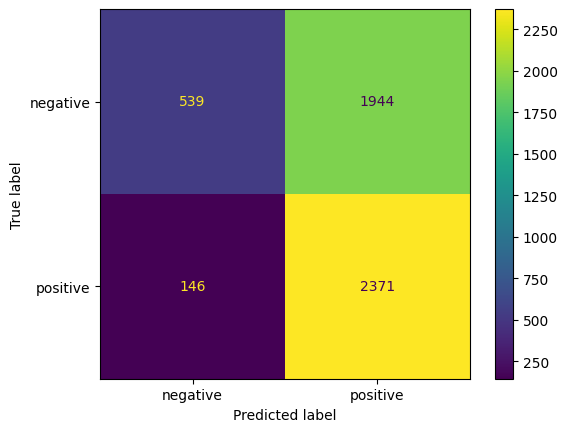

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#Compute accuracy
accuracy_nrc = accuracy_score(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])
print("Accuracy (NRC):", accuracy_nrc)

#Compute confusion matrix of human sentiment and algorithm sentiment
ConfusionMatrixDisplay.from_predictions(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])


## Vader Dictionary

### Load Vader Dictionary

We install the Vader package first, as it is not natively supported on google colab.

In [17]:
# Installing the Vader Package
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


We load the Vader (Valence Aware Dictionary and Sentiment Reasoner) model. It is a lexicon and rule-based sentiment analysis tool specifically designed for social media texts. VADER uses a pre-built dictionary of words with sentiment intensities and applies rules for handling context like negations, intensifiers, and emoticons. It provides four polarity scores for a given text: positive, negative, neutral, and a compound score (ranging from -1 to +1) that summarizes overall sentiment. It's fast, doesn't require training data, and works well on short, informal texts like tweets or reviews, though it may not capture nuanced context as well as machine learning models. In this notebook, VADER is used as an alternative to the NRC dictionary-based approach for sentiment analysis on IMDB reviews.

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa_classifier = SentimentIntensityAnalyzer()

### Preprocessing

Similar as before we tokenize the texts first, remove stopwords, and punctuation. The difference to before is that we do not perform stemming. Further we return the preprocessed tokens as a whole string and not a list of tokens as Vader expects a complete string as input.

In [19]:
def preprocess(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Get the list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

    # Remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return " ".join(filtered_tokens_nopunct)


Afterwards, we need to apply the preprocessing on the reviews and save the preprocessed text in a new column called 'text_prep'.

In [20]:
reviews['text_prep'] = reviews['text'].apply(preprocess)

### Data understanding

Taking a closer look at how the prepared text for a positive and negative review looks.

Therefore, we print the preprocessed text (`text_prep`) for the first review using `reviews.iloc[0]['text_prep']`. This shows how the original review text has been cleaned and transformed into a string of meaningful words without stopwords, punctuation, or stemming (since VADER handles this differently).

Then, we print a separator ("===") and the human-annotated sentiment for that review using `reviews.iloc[0]['sentiment_human']`. This allows us to compare the preprocessed text with its true sentiment label.

We do the same for another review (the third one, indexed as 2) to see examples from both positive and negative sentiments. This helps us understand what the input to VADER looks like and how it relates to the ground truth.

*Run the code below.*

In [21]:
print(reviews.iloc[0]['text_prep'])
print("===")
print(reviews.iloc[0]['sentiment_human'])

stuff going moment MJ 've started listening music watching odd documentary watched Wiz watched Moonwalker Maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent Moonwalker part biography part feature film remember going see cinema originally released subtle messages MJ 's feeling towards press also obvious message drugs bad m'kay. br br Visually impressive course Michael Jackson unless remotely like MJ anyway going hate find boring may call MJ egotist consenting making movie MJ fans would say made fans true really nice him. br br actual feature film bit finally starts 20 minutes excluding Smooth Criminal sequence Joe Pesci convincing psychopathic powerful drug lord wants MJ dead bad beyond MJ overheard plans Nah Joe Pesci 's character ranted wanted people know supplying drugs etc dunno maybe hates MJ 's music. br br Lots cool things like MJ turning car robot whole Speed Demon sequence Also director must patience saint came filming kiddy 

In [22]:
print(reviews.iloc[2]['text_prep'])
print("===")
print(reviews.iloc[2]['sentiment_human'])

film starts manager Nicholas Bell giving welcome investors Robert Carradine Primal Park secret project mutating primal animal using fossilized DNA like Jurassik Park scientists resurrect one nature 's fearsome predators Sabretooth tiger Smilodon Scientific ambition turns deadly however high voltage fence opened creature escape begins savagely stalking prey human visitors tourists scientific.Meanwhile youngsters enter restricted area security center attacked pack large pre-historical animals deadlier bigger addition security agent Stacy Haiduk mate Brian Wimmer fight hardly carnivorous Smilodons Sabretooths course real star stars astounding terrifyingly though convincing giant animals savagely stalking prey group run afoul fight one nature 's fearsome predators Furthermore third Sabretooth dangerous slow stalks victims. br br movie delivers goods lots blood gore beheading hair-raising chills full scares Sabretooths appear mediocre special effects.The story provides exciting stirring ent

### Distribution of the reviews

Running the code below will give us an overview of how the human sentiment is distributed among the data.

First, we use create a bar chart showing the count of positive and negative reviews. This visual representation helps us quickly see the balance between positive and negative sentiments in our dataset.

Next, we take a closer look at the absolute counts of each sentiment category.

Finally, we calculate the relative distribution by dividing the value counts by the total number of reviews (`reviews.shape[0]`). This gives us the proportion of positive and negative reviews as percentages, which is useful for understanding the class distribution.

*Run the code below.*

<Axes: xlabel='sentiment_human', ylabel='count'>

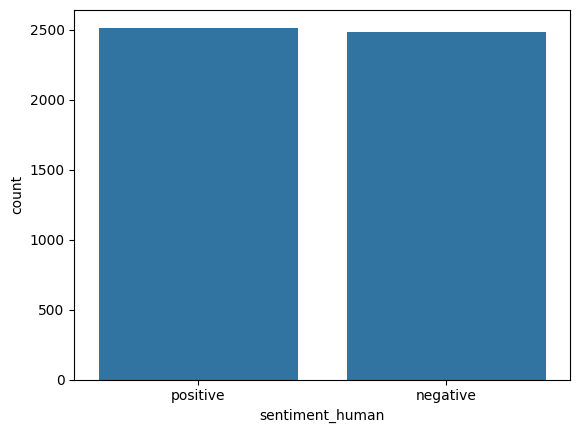

In [23]:
import seaborn as sns

sns.countplot(data=reviews, x="sentiment_human")

In [24]:
#count absolute human sentiment for the reviews
reviews["sentiment_human"].value_counts()

,count
sentiment_human,
positive,2517
negative,2483


In [25]:
#calculate the relative human sentiment for the reviews
reviews["sentiment_human"].value_counts()/reviews.shape[0]

,count
sentiment_human,
positive,0.5034
negative,0.4966


### Determine the sentiment with the model on the reviews

The code below retrieves preprocessed text (text_prep) from the data and uses VADER's polarity_scores to compute sentiment scores (neg, neu, pos, compound) for one specific review. This will give us some insights on how VADER works.

First, we print the preprocessed text for the second review (indexed as 1) using `reviews.iloc[1]["text_prep"]`. This shows the cleaned text that VADER will analyze.

Then, we call `vader_sa_classifier.polarity_scores()` on that text. VADER returns a dictionary with four scores:
- 'neg': proportion of text that falls in the negative category (0 to 1)
- 'neu': proportion of text that falls in the neutral category (0 to 1)
- 'pos': proportion of text that falls in the positive category (0 to 1)
- 'compound': normalized compound score ranging from -1 (most negative) to +1 (most positive), which summarizes the overall sentiment.

Next, we print the human-annotated sentiment for this review using `reviews.iloc[1]["sentiment_human"]`. This allows us to compare VADER's automated scores with the ground truth label.

*Run the code below.*

In [26]:
print(reviews.iloc[1]["text_prep"])
vader_sa_classifier.polarity_scores(reviews.iloc[1]["text_prep"])

'' Classic War Worlds\ '' Timothy Hines entertaining film obviously goes great effort lengths faithfully recreate H. G. Wells classic book Mr. Hines succeeds watched film appreciated fact standard predictable Hollywood fare comes every year e.g Spielberg version Tom Cruise slightest resemblance book Obviously everyone looks different things movie envision amateur '' critics\ '' look criticize everything Others rate movie important bases like entertained people never agree '' critics\ '' enjoyed effort Mr. Hines put faithful H.G Wells classic novel found entertaining made easy overlook '' critics\ '' perceive shortcomings


{'neg': 0.104, 'neu': 0.55, 'pos': 0.347, 'compound': 0.9808}

In [27]:
#print the human sentiment for this review
print(reviews.iloc[1]["sentiment_human"])

positive


Now we apply VADER to predict the sentiment for all reviews in our dataset. This is similar to what we did in the previous code section, where we analyzed one review manually, but now we automate the process for the entire dataset using a loop.

We initialize an empty list called `sentiment_vader` to store the predicted sentiments.

Then, we use a for loop with `reviews.iterrows()` to iterate through each row of the `reviews` DataFrame. For each review:
- We extract the preprocessed text from the 'text_prep' column.
- We call `vader_sa_classifier.polarity_scores()` on that text to get the sentiment scores.
- We check the 'compound' score: if it's greater than 0, we classify the sentiment as "positive"; otherwise, as "negative".
- We append this classification to the `sentiment_vader` list.

This process analyzes every review in the dataset and creates a list of predicted sentiments that we can later compare with the human labels for evaluation.

*Run the code below.*

In [28]:
sentiment_vader = []
for index, row in reviews.iterrows():
    vs = vader_sa_classifier.polarity_scores(row["text_prep"])
    if vs["compound"] > 0:
      sentiment = "positive"
    else:
      sentiment = "negative"
    sentiment_vader.append(sentiment)

In [29]:
#count values for positive and negative sentiment
negative_sentiment_vader=sentiment_vader.count("negative")
positive_sentiment_vader=sentiment_vader.count("positive")
print("Negative Sentiment Vader:",negative_sentiment_vader)
print("Positive Sentiment Vader:",positive_sentiment_vader)

Negative Sentiment Vader: 1534
Positive Sentiment Vader: 3466


In [30]:
sentiment_vader[0:10]

['negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive']

### Evaluate accuracy with human sentiment lables as ground truth

Since the task at hand is classification (the only difference lies in the type of input data) we can evaluate our model in the same way as we did before.

*Run the code below.*

Accuracy (Vader): 0.687


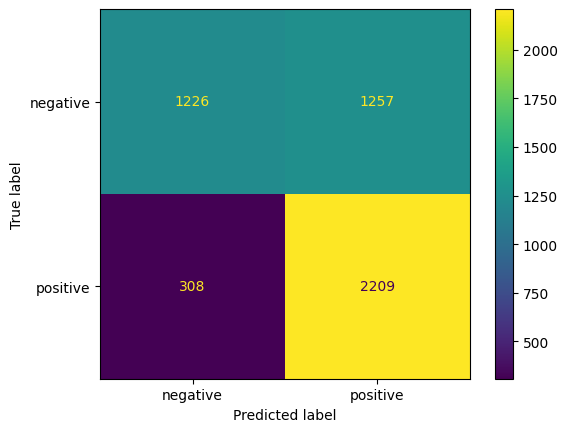

In [31]:
# Calculate Accuracy
accuracy_vader = accuracy_score(reviews['sentiment_human'], sentiment_vader)
print("Accuracy (Vader):", accuracy_vader)

# Create the confusion matrix
ConfusionMatrixDisplay.from_predictions(reviews['sentiment_human'], sentiment_vader)

## Summary
So to sum it up let us have a look what we did in this week's tutorial:

* First, we had a look at the necessary preprocessing steps (tokenization, unwanted character removal, stemming, stopword removal) needed to transform text into a more structured form.
* Secondly we performed dictionary-based sentiment analysis where we looked up the sentiment of each token in a dict and aggregated the scores in order to decide whether a review is positive or negative.
* Lastly we used known evaluation metrics for classification to evaluate our model.
* Additionaly we had a little excursion of using the pre-trained VADER model and evaluating the performance.


You can use the cell below to perform and evaluate different sentiment analyses

Results with Non-Stemmed Dictionary:
      positive_count  negative_count
0                 24              12
1                 12               1
2                 17              22
3                 21               9
4                 20              13
...              ...             ...
4995               8               9
4996              11               3
4997               8               3
4998               6               2
4999               6               4

[5000 rows x 2 columns]
Results DataFrame:
      positive_count  negative_count  sentiment_algo_score
0                 24              12                    12
1                 12               1                    11
2                 17              22                    -5
3                 21               9                    12
4                 20              13                     7
...              ...             ...                   ...
4995               8               9                    -1
499

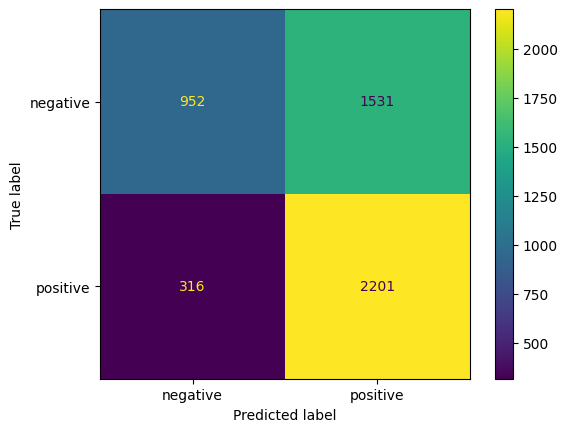

In [35]:
# Enter your Code here!
reviews['tokens'] = reviews['text'].apply(nltk.word_tokenize)

#Use the preprocessed reviews as input, which we saved as "tokens" in our data, to perform the lookup
reviews_toks_not_stemmed = reviews['tokens']

# Perform lookup with stemmed dictionary
results = [sentiment_lookup(review, sentiment_dict, stemmed_dict=False) for review in reviews_toks_not_stemmed]
df_results = pd.DataFrame(results, columns=['positive_count', 'negative_count'])
print("Results with Non-Stemmed Dictionary:")
print(df_results)

#Get a quick overview of the positive and negative results
df_results.describe()

# Calculate sentiment algorithm score (positive - negative)
df_results['sentiment_algo_score'] = df_results['positive_count'] - df_results['negative_count']

# Print the results with sentiment scores
print("Results DataFrame:")
print(df_results)

#df_results['sentiment_algo_scaled'] = df_results['sentiment_algo_score'] / (df_results['positive_count'] + df_results['negative_count'])
#df_results.fillna({'sentiment_algo_scaled': 0}, inplace=True)
#df_results['sentiment_algo_scaled'].describe()

df_results['sentiment_algo_binary'] = ['positive' if x > -0.5 else 'negative' for x in df_results['sentiment_algo_score']]
df_results['sentiment_algo_binary'].value_counts()

reviews['sentiment_human'].value_counts()

reviews_df_sent, results_df_bin = pd.DataFrame(reviews['sentiment_human']), pd.DataFrame(df_results['sentiment_algo_binary'])

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#Compute accuracy
accuracy_nrc = accuracy_score(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])
print("Accuracy (NRC):", accuracy_nrc)

#Compute confusion matrix of human sentiment and algorithm sentiment
ConfusionMatrixDisplay.from_predictions(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])